In [17]:
# Generating a toy dataset.

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

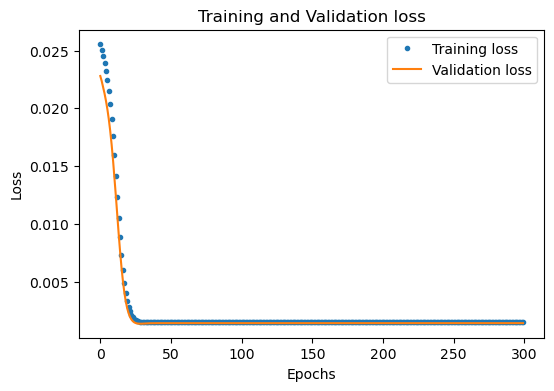

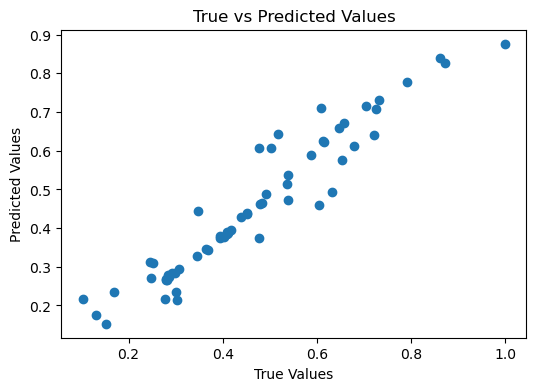

In [18]:
# Imports
import matplotlib.pyplot as plt

# Initialize parameters of weights and biases
np.random.seed(0)
w1 = 2 * np.random.rand(2, 3) - 1
b1 = np.zeros((1, 3))
w2 = 2 * np.random.rand(3, 1) - 1
b2 = np.zeros((1, 1))

# Learning rate and number of epochs
lr = 0.05
epochs = 300

# Storing costs to be graphed
train_costs = []
valid_costs = []

for epoch in range(epochs):
    for i in range(len(x_train)):
        xi = np.array(x_train[i]).reshape(1, -1)
        yi = np.array(y_train[i]).reshape(1, -1)

        # Forward propagation
        z1 = np.dot(xi, w1) + b1
        h1 = sigmoid(z1)
        z2 = np.dot(h1, w2) + b2
        h2 = sigmoid(z2)

        # Backwards propagation
        dz2 = h2 - yi
        dw2 = np.dot(h1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, w2.T) * (h1 * (1 - h1))
        dw1 = np.dot(xi.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Update training and validation costs
    train_cost = 0
    valid_cost = 0
    for i in range(len(x_train)):
        xi = np.array(x_train[i]).reshape(1, -1)
        yi = np.array(y_train[i]).reshape(1, -1)
        z1 = np.dot(xi, w1) + b1
        h1 = sigmoid(z1)
        z2 = np.dot(h1, w2) + b2
        h2 = sigmoid(z2)
        train_cost += np.sum((yi - h2) ** 2) / 2
    train_cost /= len(x_train)
    train_costs.append(train_cost)

    for i in range(len(x_valid)):
        xi = np.array(x_valid[i]).reshape(1, -1)
        yi = np.array(y_valid[i]).reshape(1, -1)
        z1 = np.dot(xi, w1) + b1
        h1 = sigmoid(z1)
        z2 = np.dot(h1, w2) + b2
        h2 = sigmoid(z2)
        valid_cost += np.sum((yi - h2) ** 2) / 2
    valid_cost /= len(x_valid)
    valid_costs.append(valid_cost)

    # Adjust the learning rate if the loss increases
    if epoch > 10 and valid_costs[-1] > valid_costs[-2]:
        lr *= .7

# Train the network with the combined training and validation dataset
x_train_valid = x_train + x_valid
y_train_valid = y_train + y_valid

for epoch in range(epochs):
    for i in range(len(x_train_valid)):
        xi = np.array(x_train_valid[i]).reshape(1, -1)
        yi = np.array(y_train_valid[i]).reshape(1, -1)

        # Forward propagation
        z1 = np.dot(xi, w1) + b1
        h1 = sigmoid(z1)
        z2 = np.dot(h1, w2) + b2
        h2 = sigmoid(z2)

        # Backwards propagation
        dz2 = h2 - yi
        dw2 = np.dot(h1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, w2.T) * (h1 * (1 - h1))
        dw1 = np.dot(xi.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

# Make predictions and compare with the actual observed results
y_pred = []
for i in range(len(x_test)):
    xi = np.array(x_test[i]).reshape(1, -1)
    z1 = np.dot(xi, w1) + b1
    h1 = sigmoid(z1)
    z2 = np.dot(h1, w2) + b2
    h2 = sigmoid(z2)
    y_pred.append(h2[0][0])

# Plotting the loss values
plt.figure(figsize=(6, 4))
plt.plot(range(epochs), train_costs, 'o', markersize=3, label='Training loss')
plt.plot(range(epochs), valid_costs, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Plotting the comparison of the predicted values and observed results
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
